In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load the merged dataset
file_path = './Virginia Public Schools Archive/demographics_sol_dataset.csv'
df = pd.read_csv(file_path)

mean_sol_pass_rate = df['SOL Pass Rate'].mean()
print(mean_sol_pass_rate)

0.663268653808416


In [3]:
df.shape

(1877, 22)

In [4]:
df.isnull().sum().sort_values(ascending=False)

cohort_dropout_rate                              1563
percentage_homeless                               222
free_reduced_lunch_percentage                     182
Bachelors_Percent                                 171
Doctoral_Percent                                  171
Masters_Percent                                   171
Total_Per_Pupil_Expenditures                      167
Division_Level_Expenditures_Per_Pupil_State       167
Division_Level_Expenditures_Per_Pupil_Federal     167
School_Level_Expenditures_Per_Pupil_State         167
School_Level_Expenditures_Per_Pupil_Federal       167
Total_Expenditures                                167
chronic_absenteeism_rate                          166
SOL Pass Rate                                     166
percentage_foster_care                             98
percentage_male                                    58
percentage_english_learners                        44
percentage_disadvantaged                           25
percentage_military         

In [5]:
numerical_df = df.select_dtypes(include= np.number)
num_summary = numerical_df.describe().T
numerical_df.head()

,percentage_disadvantaged,percentage_english_learners,percentage_foster_care,percentage_male,percentage_homeless,percentage_military,percentage_disabled,free_reduced_lunch_percentage,chronic_absenteeism_rate,cohort_dropout_rate,Bachelors_Percent,Masters_Percent,Doctoral_Percent,SOL Pass Rate,School_Level_Expenditures_Per_Pupil_Federal,School_Level_Expenditures_Per_Pupil_State,Division_Level_Expenditures_Per_Pupil_Federal,Division_Level_Expenditures_Per_Pupil_State,Total_Per_Pupil_Expenditures,Total_Expenditures
0,0.274112,0.137532,0.002538,0.522843,0.0,0.124365,0.120558,0.258,0.1081,NaN,35.0,62.0,2.0,0.7650,524.0,7333.0,571.0,3640.0,12068.0,9941898.0
1,0.381919,0.053803,0.000000,0.496310,0.0,0.025830,0.169742,0.405,0.2736,NaN,44.0,56.0,0.0,0.6975,198.0,9208.0,745.0,2110.0,12261.0,14493019.0
2,0.542135,0.194842,0.002809,0.502809,0.0,0.007022,0.141854,0.609,0.1985,NaN,31.0,69.0,0.0,0.5300,879.0,8338.0,543.0,4412.0,14172.0,6946661.0
3,0.358209,0.052434,0.003731,0.526119,0.0,0.014925,0.055970,0.373,0.2289,NaN,52.0,44.0,0.0,0.7200,861.0,8633.0,45.0,2983.0,12522.0,5874488.0
4,0.600000,0.000000,0.000000,0.494624,0.0,0.070968,0.094624,0.911,0.2294,NaN,58.0,32.0,3.0,0.5175,1540.0,6746.0,446.0,2738.0,11470.0,5366257.0


In [6]:
num_summary

,count,mean,std,min,25%,50%,75%,max
percentage_disadvantaged,1852.0,4.789965e-01,2.409772e-01,0.00,3.177511e-01,4.799329e-01,6.182932e-01,1.000000e+00
percentage_english_learners,1833.0,1.995751e-01,3.170542e-01,0.00,0.000000e+00,4.929577e-02,2.116788e-01,1.000000e+00
percentage_foster_care,1779.0,1.171120e-01,3.178648e-01,0.00,0.000000e+00,1.650165e-03,5.780540e-03,1.000000e+00
percentage_male,1819.0,5.124010e-01,6.093966e-02,0.00,4.992472e-01,5.151515e-01,5.310835e-01,1.000000e+00
percentage_homeless,1655.0,5.191336e-02,2.155176e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
percentage_military,1857.0,1.825376e-01,3.389872e-01,0.00,7.812500e-03,2.306080e-02,1.194030e-01,1.000000e+00
percentage_disabled,1860.0,2.439119e-01,2.864344e-01,0.00,1.139402e-01,1.399344e-01,1.791184e-01,1.000000e+00
free_reduced_lunch_percentage,1695.0,5.092136e-01,2.767305e-01,0.00,2.940000e-01,4.780000e-01,7.535000e-01,1.000000e+00
chronic_absenteeism_rate,1711.0,1.967887e-01,1.046815e-01,0.00,1.201000e-01,1.803000e-01,2.551000e-01,9.172000e-01
cohort_dropout_rate,314.0,5.200541e-02,6.097394e-02,0.00,1.740000e-02,3.925000e-02,6.350000e-02,5.057000e-01


In [7]:
categorical_df = df.select_dtypes(include= "object")
cat_summary = categorical_df.describe().T
categorical_df.head()

,Division Name,School Name
0,Prince William County,A. Henderson Elementary
1,Culpeper County,A.G. Richardson Elementary
2,Chesterfield County,A.M. Davis Elementary
3,Warren County,A.S. Rhodes Elementary
4,Hampton City,A.W.E. Bassette Elementary


In [8]:
cat_summary

,count,unique,top,freq
Division Name,1877,133,Fairfax County,199
School Name,1877,1803,Mountain View Elementary,8


In [9]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:100]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
cohort_dropout_rate,83.271177
percentage_homeless,11.827384
free_reduced_lunch_percentage,9.696324
Bachelors_Percent,9.110282
Masters_Percent,9.110282
Doctoral_Percent,9.110282
Total_Per_Pupil_Expenditures,8.897176
Division_Level_Expenditures_Per_Pupil_State,8.897176
Division_Level_Expenditures_Per_Pupil_Federal,8.897176
School_Level_Expenditures_Per_Pupil_State,8.897176


drop rows with missing target variable & feature with over 80% missing

In [10]:
df = df.drop(columns='cohort_dropout_rate')
df = df.dropna(subset=['SOL Pass Rate'])

In [11]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:100]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
percentage_homeless,12.098188
percentage_foster_care,5.201636
percentage_male,3.156049
percentage_english_learners,2.279369
percentage_disadvantaged,1.285798
percentage_military,1.168907
free_reduced_lunch_percentage,0.935126
percentage_disabled,0.876680
Doctoral_Percent,0.292227
Bachelors_Percent,0.292227


In [12]:
df_temp = df.drop(columns=['Division Name'])

In [13]:
num_transformer = Pipeline([
    ("Imputer", SimpleImputer(strategy= "mean")),
    ("Scaler", StandardScaler())])

cat_transformer = Pipeline([
    ("Imputer", SimpleImputer(strategy= "constant", fill_value= "MISSING")),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

In [14]:
categorical_columns = df_temp.select_dtypes(include='object').columns
numerical_columns = df_temp.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    [("num", num_transformer, numerical_columns),
     ("cat", cat_transformer, categorical_columns)],
    remainder= "passthrough")

pipeline = Pipeline([("preprocessor", preprocessor)])

In [15]:
X_preprocessed = preprocessor.fit_transform(df_temp)

In [16]:
X = pd.DataFrame(X_preprocessed, columns= preprocessor.get_feature_names_out())
X.head()

,num__percentage_disadvantaged,num__percentage_english_learners,num__percentage_foster_care,num__percentage_male,num__percentage_homeless,num__percentage_military,num__percentage_disabled,num__free_reduced_lunch_percentage,num__chronic_absenteeism_rate,num__Bachelors_Percent,...,cat__School Name_Woolwine Elementary,cat__School Name_Yellow Branch Elementary,cat__School Name_York High,cat__School Name_York River Academy,cat__School Name_Yorkshire Elementary,cat__School Name_Yorktown Elementary,cat__School Name_Yorktown High,cat__School Name_Yorktown Middle,cat__School Name_Yowell Elementary,cat__School Name_Yuma Elementary
0,-0.873119,-0.221090,-0.381386,0.200292,-0.263296,-0.183014,-0.434027,-0.912335,-0.847472,-0.506522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.420032,-0.484900,-0.389405,-0.260542,-0.263296,-0.472237,-0.262086,-0.378474,0.733977,0.223246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.253316,-0.040519,-0.380531,-0.147663,-0.263296,-0.527442,-0.359579,0.362396,0.016353,-0.830863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.519679,-0.489213,-0.377616,0.257204,-0.263296,-0.504246,-0.659821,-0.494688,0.306843,0.871928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.496509,-0.654422,-0.389405,-0.289830,-0.263296,-0.339748,-0.524692,1.459172,0.311620,1.358440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold

from scipy.stats import uniform, randint
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np

In [18]:
y = df['SOL Pass Rate']
y

0       0.7650
1       0.6975
2       0.5300
3       0.7200
4       0.5175
         ...  
1872    0.7925
1873    0.8500
1874    0.7180
1875    0.5500
1876    0.7150
Name: SOL Pass Rate, Length: 1711, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Define models
models = {
    f"RandomForest_{i}": RandomForestRegressor(random_state=42)
    for i in range(1, 2)
}
# Add Linear Regression to the models
models["LinearRegression"] = LinearRegression()

# Define hyperparameter grids for RandomForestRegressor
random_param_grids = {
    f"RandomForest_{i}": {
        "n_estimators": [50 * i, 100 * i, 150 * i],
        "max_depth": [10 * i, 20 * i, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
    if i % 2 == 0 else {
        "n_estimators": [75 * i, 125 * i, 200 * i],
        "max_depth": [5 * i, 15 * i, None],
        "min_samples_split": [3, 6, 9],
        "min_samples_leaf": [1, 3, 5]
    }
    for i in range(1, 2)
}
# Linear Regression does not require hyperparameter tuning
random_param_grids["LinearRegression"] = None


In [21]:
from xgboost import XGBRegressor

# Add XGBoost model to the models dictionary
models["XGBoost"] = XGBRegressor(random_state=42, use_label_encoder=False)

# Define hyperparameter grid for XGBoost
random_param_grids["XGBoost"] = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 1.5, 2]
}


<h1> Continuous <h1>

In [22]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, RandomizedSearchCV

# Cross-validation configuration
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Store model tuning and results
grids = {}
test_errors = {}
results = []

# Loop through models and hyperparameter grids
for model_name, model in models.items():
    if model_name in random_param_grids and random_param_grids[model_name]:  # Check if grid is defined
        print(f'Training and tuning {model_name}...')
        
        # RandomizedSearchCV for hyperparameter tuning
        grids[model_name] = RandomizedSearchCV(
            estimator=model,
            param_distributions=random_param_grids[model_name],
            n_iter=5,
            cv=cv,
            scoring='neg_mean_squared_error',  # Using MSE for scoring
            n_jobs=-1,
            verbose=3
        )
        grids[model_name].fit(X_train, y_train)
        
        # Extract best parameters and scores
        best_params = grids[model_name].best_params_
        best_score = -grids[model_name].best_score_  # Convert back to positive MSE
        print(f'Best parameters for {model_name}: {best_params}')
        print(f'Best CV Mean Squared Error for {model_name}: {best_score:.4f}\n')

        # Evaluate on test set
        best_model = grids[model_name].best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        test_errors[model_name] = mse
        print(f"Test Metrics for {model_name}:")
        print(f" - Mean Squared Error: {mse:.4f}")
        print(f" - Mean Absolute Error: {mae:.4f}")
        print(f" - R² Score: {r2:.4f}\n")

        # Log results for this model
        results.append({
            "model": model_name,
            "mean_cv_mse": best_score,
            "test_mse": mse,
            "test_mae": mae,
            "test_r2": r2,
            "best_params": best_params
        })
    else:
        print(f'{model_name} does not require hyperparameter tuning. Training directly...')
        
        # Train directly without tuning
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        test_errors[model_name] = mse
        print(f"Test Metrics for {model_name}:")
        print(f" - Mean Squared Error: {mse:.4f}")
        print(f" - Mean Absolute Error: {mae:.4f}")
        print(f" - R² Score: {r2:.4f}\n")

        # Log results for this model
        results.append({
            "model": model_name,
            "mean_cv_mse": None,  # No CV score since not tuned
            "test_mse": mse,
            "test_mae": mae,
            "test_r2": r2,
            "best_params": model.get_params()
        })

# Save results to a CSV file
results_df = pd.DataFrame(results)
output_file = "ml_model_results_continuous.csv"

if os.path.exists(output_file):
    # If the file exists, append the new results
    existing_df = pd.read_csv(output_file)
    updated_df = pd.concat([existing_df, results_df], ignore_index=True)
    updated_df.to_csv(output_file, index=False)
    print(f"Results appended to {output_file}")
else:
    # If the file does not exist, create it
    results_df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")


Training and tuning RandomForest_1...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[CV 2/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=75;, score=-0.000 total time=   1.1s
[CV 3/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=75;, score=-0.000 total time=   1.1s
[CV 1/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=75;, score=-0.000 total time=   1.2s
[CV 2/3] END max_depth=15, min_samples_leaf=1, min_samples_split=9, n_estimators=125;, score=-0.000 total time=   1.9s
[CV 1/3] END max_depth=15, min_samples_leaf=1, min_samples_split=9, n_estimators=125;, score=-0.000 total time=   2.0s
[CV 3/3] END max_depth=15, min_samples_leaf=1, min_samples_split=9, n_estimators=125;, score=-0.000 total time=   2.0s
[CV 2/3] END max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=75;, score=-0.000 total time=   1.1s
[CV 1/3] END max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=75;, score=-0.000 total time=   1.2s
[CV 1/3] END max_depth=None, min_samples_leaf=3

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50, reg_alpha=1, reg_lambda=1, subsample=0.8;, score=-0.001 total time=   0.9s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50, reg_alpha=1, reg_lambda=1, subsample=0.8;, score=-0.001 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50, reg_alpha=1, reg_lambda=1, subsample=0.8;, score=-0.001 total time=   0.9s
[CV 1/3] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0;, score=-0.000 total time=   1.2s
[CV 3/3] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0;, score=-0.000 total time=   1.2s
[CV 2/3] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0, reg_lambda=2, subsample=0.8;, score=-0.000 total time=   1.6s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0, reg_lambda=2, subsample=0.8;, score=-0.000 total time=   1.6s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0, reg_lambda=2, subsample=0.8;, score=-0.000 total time=   1.6s
[CV 1/3] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, reg_alpha=1, reg_lambda=1, subsample=1.0;, score=-0.011 total time=   0.7s
[CV 2/3] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, reg_alpha=1, reg_lambda=1, subsample=1.0;, score=-0.010 total time=   0.7s
[CV 3/3] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best CV Mean Squared Error for XGBoost: 0.0000

Test Metrics for XGBoost:
 - Mean Squared Error: 0.0000
 - Mean Absolute Error: 0.0014
 - R² Score: 0.9997

Results appended to ml_model_results_continuous.csv


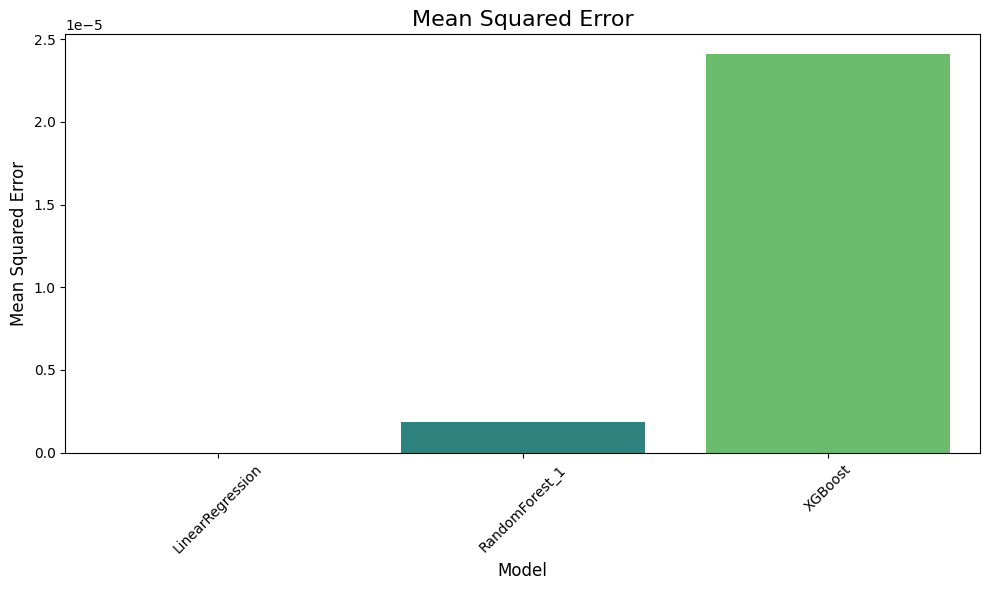

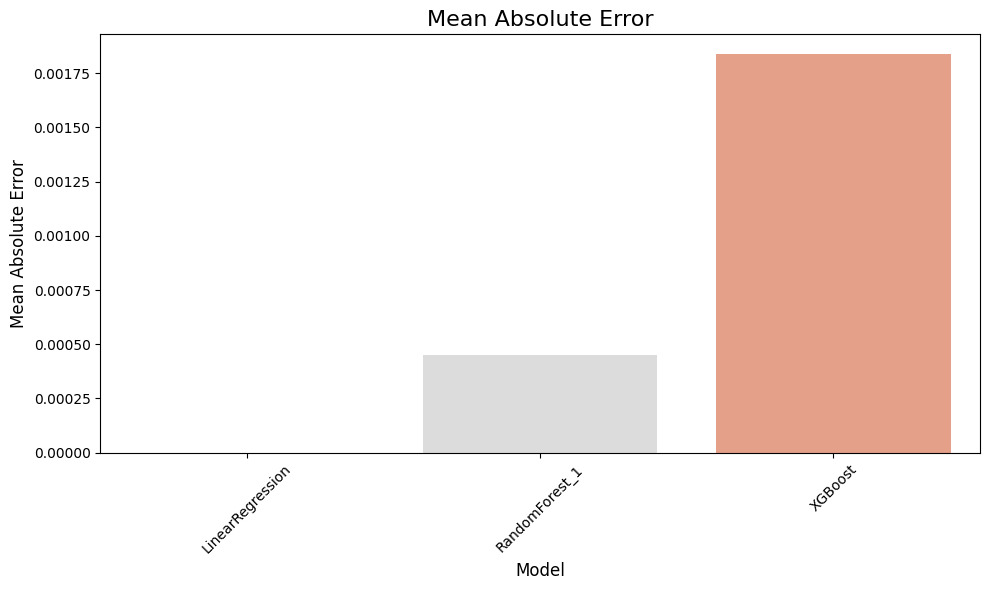

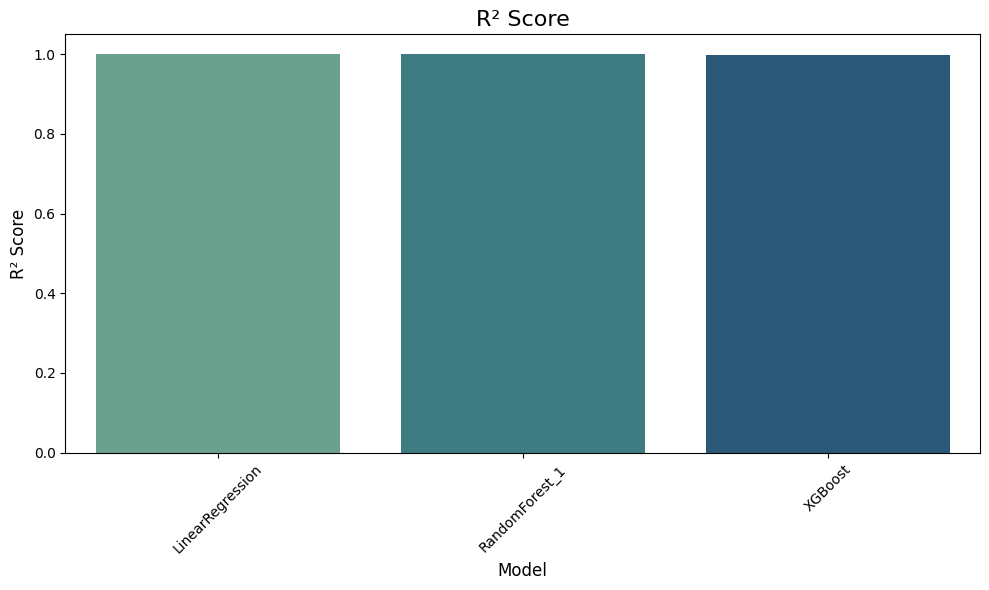

In [23]:
results_df = pd.read_csv(output_file)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='model', y='test_mse', hue='model', palette='viridis', dodge=False, legend=False, errorbar=None)
plt.title('Mean Squared Error', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='model', y='test_mae', hue='model', palette='coolwarm', dodge=False, legend=False, errorbar=None)
plt.title('Mean Absolute Error', fontsize=16)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='model', y='test_r2', hue='model', palette='crest', dodge=False, legend=False, errorbar=None)
plt.title('R² Score', fontsize=16)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
